## 災害の種類と死亡者数の関係

災害の種類によってどれだけの死亡者数が出ているのか、何の災害が多くの死亡者を出しているのかを調べました。

In [57]:
import pandas as pd

emdat = pd.read_csv("emdat.csv")
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


各列名が何のことなのか分かりやすいように、日本語に直しました。

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォント（Windows向け）
plt.rcParams['font.family'] = 'MS Gothic'

# CSV読み込み
emdat = pd.read_csv('emdat.csv')

# 列名を日本語に変更
emdat = emdat.rename(columns={
    'Disaster Subgroup': '災害サブグループ',
    'Disaster Type': '災害タイプ',
    'Disaster Subtype': '災害サブタイプ',
    'ISO': 'ISOコード',
    'Country': '国名',
    'Subregion': '小地域',
    'Region': '地域',
    'Latitude': '緯度',
    'Longitude': '経度',
    'Start Year': '開始年',
    'Total Deaths': '死亡者数'
})

# 確認
emdat.head()


,災害サブグループ,災害タイプ,災害サブタイプ,ISOコード,国名,小地域,地域,緯度,経度,開始年,死亡者数
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


まず、災害サブグループの発生件数を調べ、グラフに表しました。<br>
すると、Hydrological(水文)やMeteorological(気象)の発生件数が圧倒的に多いことが分かりました。<br>
Biological(生物学的)も発生件数が多いかと思いましたが、上の二つと比べると死亡者が抑えられていることから、医学の発展が関係していると考えました。


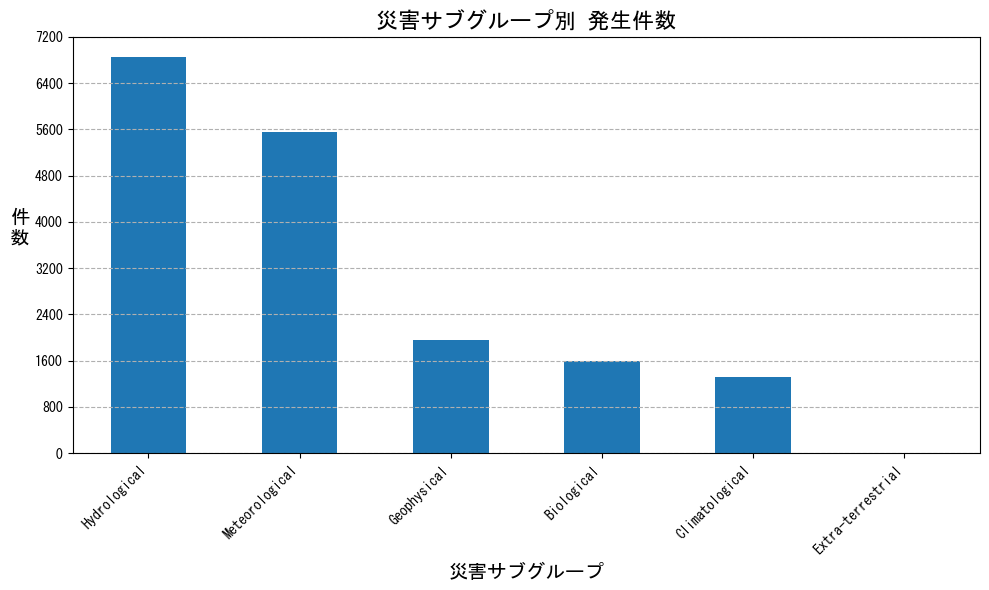

--- 災害サブグループ別 発生件数 ---
災害サブグループ
Hydrological         6860
Meteorological       5550
Geophysical          1949
Biological           1599
Climatological       1319
Extra-terrestrial       1
Name: 災害サブグループ, dtype: int64
--------------------------------


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 

plt.rcParams['font.family'] = 'MS Gothic'

# 1. 災害サブグループごとの発生件数を計算
# 各グループの出現回数を数えます。
disaster_subgroup_counts = emdat.groupby('災害サブグループ')['災害サブグループ'].count().sort_values(ascending=False)

# 2. 棒グラフの描画
fig, ax = plt.subplots(figsize=(10, 6))

# 棒グラフをプロット
disaster_subgroup_counts.plot(kind='bar', ax=ax)

# 3. 縦軸の目盛りを整数に設定 (件数は整数値であるため)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# タイトルとラベルの設定
ax.set_title('災害サブグループ別 発生件数', fontsize=16)
ax.set_xlabel('災害サブグループ', fontsize=14)
ax.set_ylabel('発生件数 (件)', fontsize=14)
plt.ylabel('件\n数', rotation=0, ha='right', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 集計結果の表示
print("--- 災害サブグループ別 発生件数 ---")
print(disaster_subgroup_counts)
print("--------------------------------")

In [60]:
# 調べたい災害タイプを変数に設定
target_disaster = 'Flood'

# 1. 特定の災害タイプのみを抽出
filtered_data = emdat[emdat['災害タイプ'] == target_disaster]

# 2. 死亡者数の合計を計算
total_deaths = filtered_data['死亡者数'].sum()

# 3. 結果の表示
print(f"--- 災害タイプ: '{target_disaster}' の分析結果 ---")
print(f"該当する災害事例の件数: {len(filtered_data)} 件")
print(f"合計死亡者数: {total_deaths:,.0f} 人")
print("------------------------------------------")

--- 災害タイプ: 'Flood' の分析結果 ---
該当する災害事例の件数: 6014 件
合計死亡者数: 7,016,630 人
------------------------------------------


次に、災害タイプ(災害サブグループの具体的な現象や形態を表したもの)の発生件数とそれに伴う死亡者数の関係をグラフに表しました。

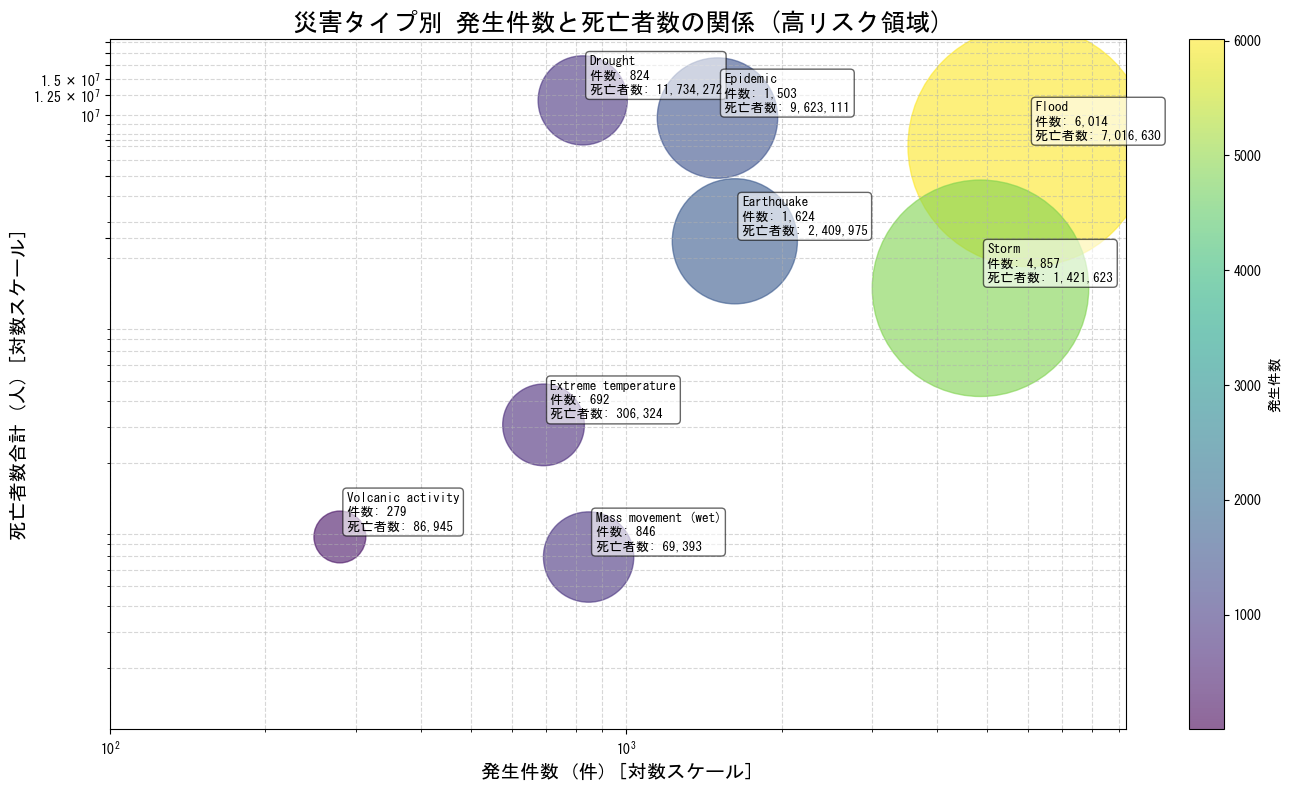

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# --- 1. データの準備と前処理 ---
# 日本語フォント（Windows向け）の設定
plt.rcParams['font.family'] = 'MS Gothic'

# CSV読み込み
# ファイル名が 'emdat.csv' であることを想定しています。
emdat = pd.read_csv('emdat.csv')

# 列名を日本語に変更
emdat = emdat.rename(columns={
    'Disaster Subgroup': '災害サブグループ',
    'Disaster Type': '災害タイプ',
    'Disaster Subtype': '災害サブタイプ',
    'ISO': 'ISOコード',
    'Country': '国名',
    'Subregion': 'サブリージョン',
    'Region': 'リージョン',
    'Latitude': '緯度',
    'Longitude': '経度',
    'Start Year': '開始年',
    'Total Deaths': '死亡者数'
})


# --- 2. 災害タイプ別の集計 ---
# 発生件数 (Count) と 死亡者数 (Total Deaths) の集計
disaster_counts = emdat.groupby('災害タイプ')['災害タイプ'].count()
death_totals = emdat.groupby('災害タイプ')['死亡者数'].sum()

# データを結合して分析用データフレームを作成
analysis_df = pd.DataFrame({
    '発生件数': disaster_counts,
    '死亡者数': death_totals
}).dropna()


# --- 3. バブルチャートの描画と設定 ---
fig, ax = plt.subplots(figsize=(14, 8))

# 散布図（バブルチャート）をプロット
scatter = ax.scatter(
    x=analysis_df['発生件数'],
    y=analysis_df['死亡者数'],
    # マーカーサイズは発生件数に応じて変化
    s=analysis_df['発生件数'] * 5,
    alpha=0.6,
    # マーカーの色も発生件数に応じて変化
    c=analysis_df['発生件数'],
    cmap='viridis'
)

# グラフのスケールと表示範囲の設定
ax.set_xscale('log')
ax.set_yscale('log')

# --- 【高リスク領域にフォーカスするための設定】 ---
# X軸の最小値を 10^2 (100) に設定し、高頻度側を強調
ax.set_xlim(left=10**2) 
# Y軸の最小値を 10^4 (10000) に設定し、高死亡者数側を強調
ax.set_ylim(bottom=10**4) 
# ---------------------------------------------


# --- 4. 装飾とラベル設定 ---
ax.set_title('災害タイプ別 発生件数と死亡者数の関係 (高リスク領域)', fontsize=18)
ax.set_xlabel('発生件数 (件) [対数スケール]', fontsize=14)
ax.set_ylabel('死亡者数合計 (人) [対数スケール]', fontsize=14)

# Y軸の目盛りを整数に設定 (念のため)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))


# --- 【数値をラベルに追加する処理】 ---
# 死亡者数が多い上位10件の災害タイプを抽出（表示を限定するため）
top_n = analysis_df['死亡者数'].nlargest(10).index

for disaster_type, row in analysis_df.iterrows():
    if disaster_type in top_n:
        
        # 発生件数と死亡者数を整数化し、カンマ区切りにフォーマット
        件数 = int(row['発生件数'])
        死亡者数 = int(row['死亡者数'])
        
        件数_formatted = f'{件数:,}'
        死亡者数_formatted = f'{死亡者数:,}'
        
        # 表示するテキストを作成: 災害タイプ名 + 改行 + 数値
        label_text = (
            f'{disaster_type}\n'  # 災害タイプ名
            f'件数: {件数_formatted}\n'  # 発生件数
            f'死亡者数: {死亡者数_formatted}' # 死亡者数合計
        )

        ax.annotate(
            label_text,
            (row['発生件数'], row['死亡者数']),
            textcoords="offset points",
            xytext=(5, 5), # ラベルの位置を少しずらす
            ha='left',
            fontsize=9.5, # 文字が重ならないように少し小さくする
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.6) # 背景ボックスを追加して見やすくする
        )
# ------------------------------------

# カラーバーの追加（マーカーの色が示す発生件数を説明）
cbar = fig.colorbar(scatter, ax=ax, label='発生件数')

plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

グラフから、災害タイプの発生件数と死亡者数はあまり比例しないということが分かりました。<br>
例えば、災害の発生件数が最も多いのはFloog(洪水)ですが、死亡者数が最も多いのは、発生件数がそこまで多くないDrought(干ばつ)であることが分かります。<br>
そこで、なぜ干ばつでの死亡者数が発生件数に比べて多いのか調べたところ、干ばつは長期的に起こるものなので、それによる飢餓と疫病の蔓延が死亡者数に影響していると分かりました。